#  <center>What brings in visitors to the beaches of Puerto Rico<center>

### Notes and objectives
1. The main purpose of this exercize is to determine what features impact most in the number of visitors to the beaches of Puerto Rico
2. The original dataset is using mobile device data that in my experience is a 3% sample of total population
3. We will examine correlations between features and visitors
4. We will try five dirrent ML regression models, validate the best fit, and view feature importance

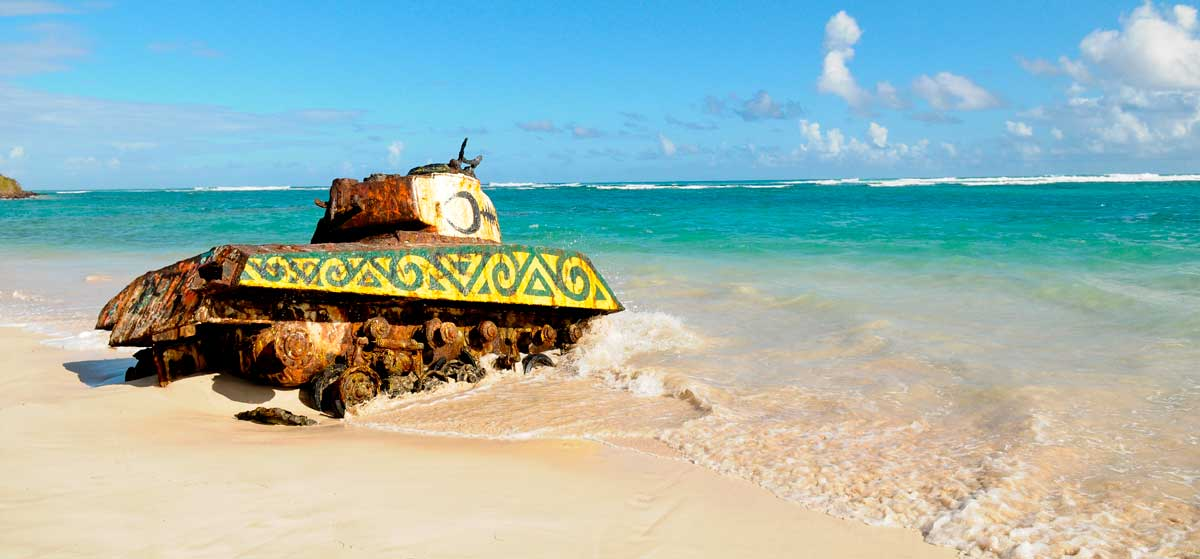

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import seaborn as sns
from shapely.geometry import Point
from geopandas import GeoDataFrame

## Getting Dataset

In [404]:
df=pd.read_csv(r"C:\Users\charl.DESKTOP-E4F6RTP\Estudios Tecnicos Inc\Valorización de Playas - General\GIS\Data movil\2721534_Playas_expanded_cel_cdl_detailed_report\2721534_Playas_expanded_cel_cdl_detailed_report_cel.tsv.gz",delimiter='	',parse_dates=['Visit Date','Visit Timestamp'],low_memory= False)

In [405]:
df.head()

,Polygon Id,Hashed Ubermedia Id,Common Evening Lat,Common Evening Long,Visit Timestamp,Common Evening Country,Common Evening Census,Common Evening Micro,Common Evening Municipality,Common Evening Admin,Common Evening Province,Common Evening Postal1,Common Evening Postal2,Common Evening Custom1,Common Evening Custom2,Common Evening Distance Mi,Visit Date,Visit Time,Visit Day of Week
0,"Playa de El Morro,San Juan",ff5f0edd7b5c6dc9a85f1d4594e7e65377a30aca,42.73567,-84.471550,1646850649,USA,260650039021,East Lansing city,"Lansing, MI",Ingham County,MI,48823,NaN,NaN,NaN,1992.587657,2022-03-09,14:30:49,Wed
1,"Playa en los Kioskos de Luquillo,Luquillo",ff5f0edd7b5c6dc9a85f1d4594e7e65377a30aca,42.73567,-84.471550,1646676439,USA,260650039021,East Lansing city,"Lansing, MI",Ingham County,MI,48823,NaN,NaN,NaN,2010.345835,2022-03-07,14:07:19,Mon
2,"Pocita del Condado/ Peña del Perro,San Juan",ff5f0edd7b5c6dc9a85f1d4594e7e65377a30aca,42.73567,-84.471550,1646754231,USA,260650039021,East Lansing city,"Lansing, MI",Ingham County,MI,48823,NaN,NaN,NaN,1994.548453,2022-03-08,11:43:51,Tue
3,"Laguna Condado/ Parque Jaime Bénitez,San Juan",1ebff17a0525644e9615e860f0b3b9450499b4c0,18.45064,-66.080244,1637645657,NaN,721270020021,NaN,NaN,Santurce,PR,NaN,00907,NaN,NaN,0.588696,2021-11-23,01:34:17,Tue
4,"Laguna Condado/ Parque Jaime Bénitez,San Juan",1ebff17a0525644e9615e860f0b3b9450499b4c0,18.45064,-66.080244,1637732146,NaN,721270020021,NaN,NaN,Santurce,PR,NaN,00907,NaN,NaN,0.588696,2021-11-24,01:35:46,Wed


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642163 entries, 0 to 642162
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Polygon Id                   642163 non-null  object        
 1   Hashed Ubermedia Id          642163 non-null  object        
 2   Common Evening Lat           641530 non-null  float64       
 3   Common Evening Long          641530 non-null  float64       
 4   Visit Timestamp              642163 non-null  object        
 5   Common Evening Country       147507 non-null  object        
 6   Common Evening Census        639246 non-null  object        
 7   Common Evening Micro         144176 non-null  object        
 8   Common Evening Municipality  144739 non-null  object        
 9   Common Evening Admin         639352 non-null  object        
 10  Common Evening Province      639158 non-null  object        
 11  Common Evening Postal1    

In [101]:
count = pd.DataFrame(df.groupby('Polygon Id').agg({'Hashed Ubermedia Id':'nunique','Polygon Id':'count','Common Evening Distance Mi':'mean'})).rename(columns={'Polygon Id':'count','Hashed Ubermedia Id':'unique','Common Evening Distance Mi':'Common Evening Distance Mi mean'})

In [102]:
count[['estimated_yearly_visitors','estimated_yearly_visits','x']] = (count/.03).astype('int')

In [104]:
count = count.sort_values(by='count',ascending= False).iloc[:,:5]

In [322]:
count.head()

,unique,count,Common Evening Distance Mi mean,estimated_yearly_visitors,estimated_yearly_visits
Polygon Id,,,,,
"Levittown/ Ensenada Boca Vieja,Toa Baja",8911,24243,85.251603,297033,808100
"Caribe Hilton,San Juan",8920,22973,825.743001,297333,765766
"Aguadilla Pueblo,Aguadilla",6772,17844,148.196381,225733,594800
"Pocita del Condado/ Peña del Perro,San Juan",8178,14605,657.833625,272600,486833
"Condado/Ventana al Mar/ Paseo Don Juan,San Juan",7273,13708,780.239117,242433,456933


In [140]:
playas= pd.read_csv(r"C:\Users\charl.DESKTOP-E4F6RTP\Estudios Tecnicos Inc\Valorización de Playas - General\GIS\playas.csv")

In [145]:
merged = pd.merge(left=count,right=playas,left_on='Polygon Id', right_on='Name',how='outer')

In [149]:
#did a little cleaning on excel since its faster. It's a small dataset.
merged.to_csv(r'C:\Users\charl.DESKTOP-E4F6RTP\Estudios Tecnicos Inc\Valorización de Playas - General\GIS\Data movil\merged.csv',encoding='utf8')

In [156]:
pd.options.display.max_columns=123

# <center>Normalizing and feature creation

In [407]:
df = pd.read_csv(r"C:\Users\charl.DESKTOP-E4F6RTP\Estudios Tecnicos Inc\Valorización de Playas - General\GIS\ML\merged.csv",encoding='CP1252')

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 74 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Name                                                          352 non-null    object 
 1   Unique Visitors                                               352 non-null    int64  
 2   Visits                                                        352 non-null    int64  
 3   Common Evening Distance Mi mean                               352 non-null    float64
 4   Region_DRN                                                    349 non-null    object 
 5   Long                                                          352 non-null    float64
 6   Lat                                                           352 non-null    float64
 7   Titularida                                                    261 non-n

In [353]:
df.describe()

,Unique Visitors,Visits,Common Evening Distance Mi mean,Long,Lat,Distrito_P,ANP,Arenosa,Rocosa,Acantilada,Manglares,Humedal,Escarpada,area_desa,Invasiones costeras,Portones y verjas u otra estructura,R?tulos que identifican los accesos como privados,"Acceso controlado (guardias, c?maras de seguridad, horarios)",Falta de infraestructura y servicios,Caminos inapropiados,Congesti?n vehicular/ estacionamientos improvisados,Condiciones naturales,Erosi?n,Establecimiento de un ANP p?blica,Establecimiento de un ANP privada,Posible presencia de municiones militares sin detonar,Actividad delictiva,Requiere embarcaci?n,Accesibilidad impedida*,Vereda,Vehicular_,Vehicula_1,Vehicula_2,Merendar,Pesca_de_o,Observaci?,Acampar,Observac_1,Caminatas,Deslizamie,Kayaks_y_b,Embarcacio,Balneario,Boyas?,Facilidade,Acceso_bot,Marinas,Centro_vac,Rampa_bote,Estacionam,Villa_Pesq,Muelle,Hospederí,Restaurant,Malecón__,Área_de_a,Casas_remo,Acceso_par,Duchas,Servicios_,Depósito_,Alquiler_e,Luz_y_agua,Teléfono,Transporta,Salvavidas,Carril_de_,Nadable_19,Concurrida,distance
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.00000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,1062.724432,1824.326705,379.275739,65.771690,18.121854,0.139205,0.099432,0.360795,0.167614,0.022727,0.073864,0.034091,0.017045,0.250000,0.034091,0.093750,0.045455,0.068182,0.025568,0.039773,0.079545,0.048295,0.184659,0.085227,0.019886,0.048295,0.025568,0.022727,0.039773,0.326705,0.494318,0.071023,0.389205,0.247159,0.389205,0.264205,0.090909,0.397727,0.303977,0.207386,0.102273,0.116477,0.059659,0.142045,0.022727,0.068182,0.025568,0.045455,0.147727,0.062500,0.113636,0.12500,0.130682,0.215909,0.076705,0.036932,0.022727,0.093750,0.079545,0.133523,0.235795,0.036932,0.085227,0.119318,0.045455,0.073864,0.039773,0.292614,0.062500,279.119318
std,1786.363508,3248.734640,343.735918,6.141294,1.694490,0.346653,0.299667,0.480915,0.374055,0.149245,0.261921,0.181721,0.129625,0.433629,0.181721,0.291896,0.208595,0.252416,0.158068,0.195703,0.270973,0.214695,0.388573,0.279617,0.139809,0.214695,0.158068,0.149245,0.195703,0.469676,0.500679,0.257228,0.488264,0.431974,0.488264,0.441536,0.287889,0.490125,0.460628,0.406012,0.303438,0.321253,0.237191,0.349594,0.149245,0.252416,0.158068,0.208595,0.355335,0.242406,0.317821,0.33119,0.337532,0.412037,0.266501,0.188863,0.149245,0.291896,0.270973,0.340623,0.425099,0.188863,0.279617,0.324624,0.208595,0.261921,0.195703,0.455610,0.242406,126.750164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000
25%,74.250000,128.000000,147.677500,65.767048,18.092027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [409]:
df.drop(columns=['Lat','Long'],inplace=True)
#droping lat/long.
#will be using regions as location metric with dummy variables instead.

In [355]:
list(pd.get_dummies(df[['Region_DRN','Titularida','Resumen_Accesibilidad']]).columns)

['Region_DRN_Aguadilla',
 'Region_DRN_Arecibo',
 'Region_DRN_Guayama',
 'Region_DRN_Humacao',
 'Region_DRN_Mayagüez',
 'Region_DRN_Ponce',
 'Region_DRN_San Juan',
 'Titularida_Mixta',
 'Titularida_Privada',
 'Titularida_Pública',
 'Titularida_Pública0 Federal',
 'Resumen_Accesibilidad_Accesibilidad limitada',
 'Resumen_Accesibilidad_Accesible',
 'Resumen_Accesibilidad_Inaccesible',
 'Resumen_Accesibilidad_Sin Información']

In [356]:
df[list(pd.get_dummies(df[['Region_DRN','Titularida','Resumen_Accesibilidad']]).columns)] = pd.get_dummies(df[['Region_DRN','Titularida','Resumen_Accesibilidad']])

In [357]:
df.drop(columns=['Region_DRN','Titularida','Resumen_Accesibilidad'],inplace=True)

In [358]:
df.columns=df.columns.to_flat_index()

In [359]:
pd.options.display.max_rows=353

In [360]:
corr = pd.DataFrame(df.corr().iloc[:,:3].abs())

In [361]:
corr =corr.sort_values(by='Visits',ascending=False)

## <center> Correlations - Red or closer to 1 indicates higher correlation 
<center>standard Pearson<center>

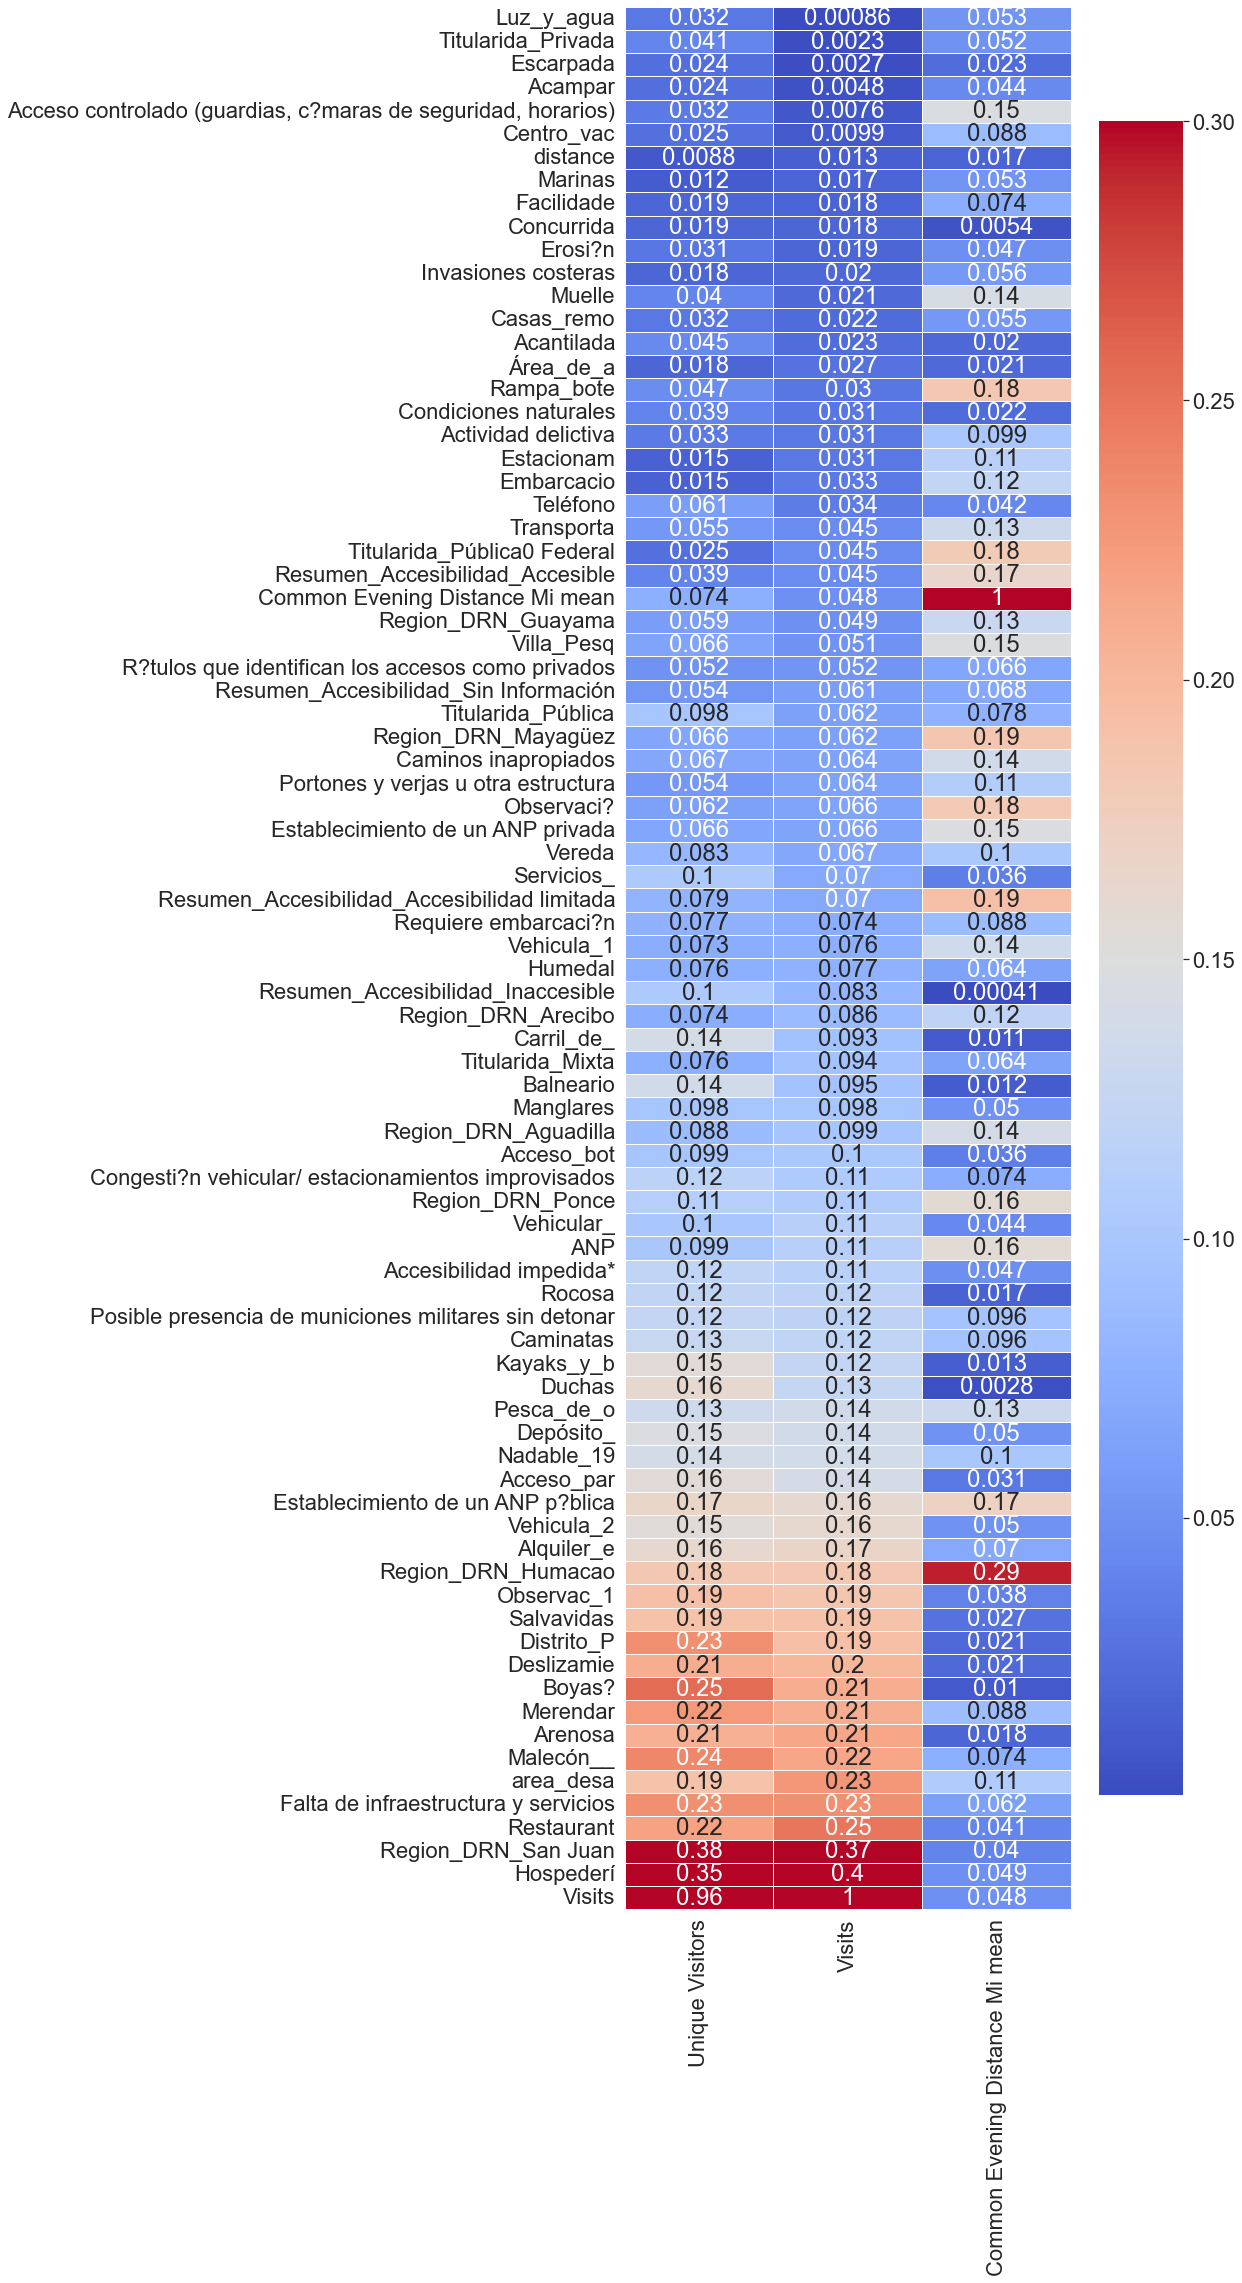

<Figure size 2880x360 with 0 Axes>

In [696]:
sns.set(rc={'figure.figsize':(10,35)})
sns.set(font_scale = 2)
ax = sns.heatmap(corr.sort_values(by='Visits',ascending=True),annot=True,linewidths=.5,cmap='coolwarm',vmax=.3)
plt.figure(figsize = (40,5))
plt.show()


## <center> Correlation by region

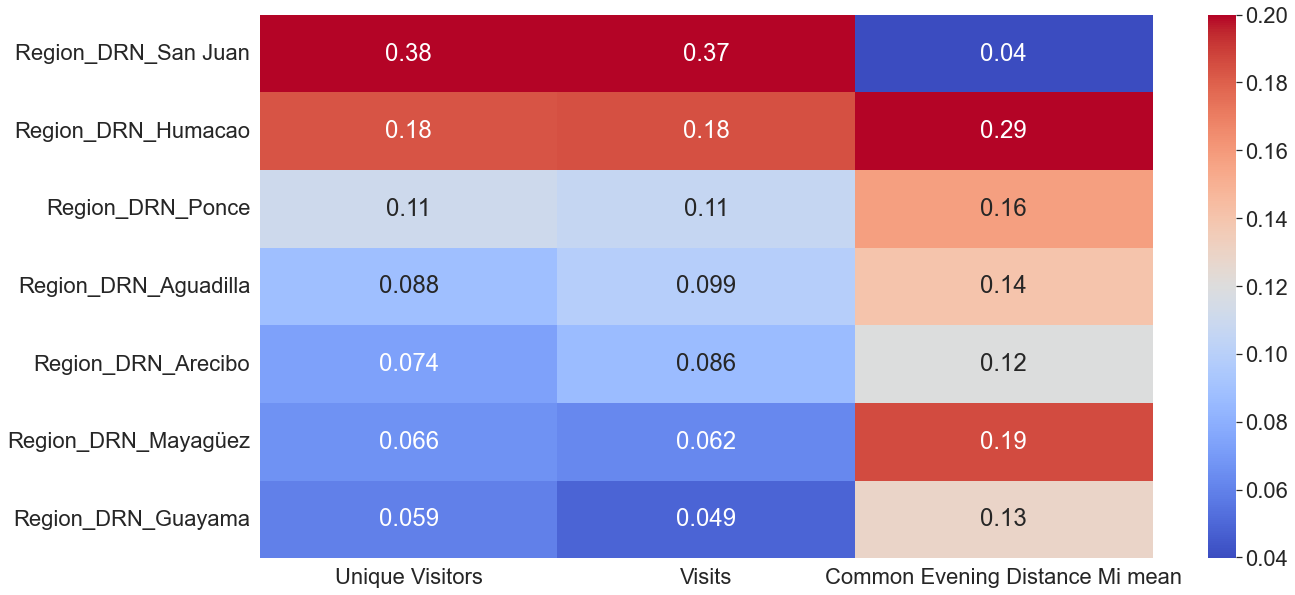

In [697]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set(font_scale=2)
ax=sns.heatmap(corr.loc[corr.index.str.contains('Region')],cmap='coolwarm',annot=True,vmax=.2)

In [364]:
corr.drop(labels='Unique Visitors',inplace=True)

In [365]:
df['Visits'] = df['Visits']/.03
#calculating visit estimate

In [366]:
df['Visits'] = df['Visits'].astype('int')

In [367]:
distance = df['distance']

In [368]:
#getting z score for distance. 
#Doesn't actually matter because beach distance has a very low correlation with visitors.
#I decided not to use it to not overcomplicate models.
df['distance']=distance.apply(lambda x: (x-df.distance.mean())/df.std()).iloc[:,-1]

C:\Users\charl.DESKTOP-E4F6RTP\AppData\Local\Temp\ipykernel_41372\1485606002.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['distance']=distance.apply(lambda x: (x-df.distance.mean())/df.std()).iloc[:,-1]


In [373]:
# choosing relevant variables. Too many features and not enough instances result in degraded performance and/or overfitting
variables = corr[corr['Visits']>.0489].index

In [375]:
#there are the variables chosen for ML
variables.sort_values()

Index(['ANP', 'Accesibilidad impedida*', 'Acceso_bot', 'Acceso_par',
       'Alquiler_e', 'Arenosa', 'Balneario', 'Boyas?', 'Caminatas',
       'Caminos inapropiados', 'Carril_de_',
       'Congesti?n vehicular/ estacionamientos improvisados', 'Depósito_',
       'Deslizamie', 'Distrito_P', 'Duchas',
       'Establecimiento de un ANP p?blica',
       'Establecimiento de un ANP privada',
       'Falta de infraestructura y servicios', 'Hospederí', 'Humedal',
       'Kayaks_y_b', 'Malecón__', 'Manglares', 'Merendar', 'Nadable_19',
       'Observac_1', 'Observaci?', 'Pesca_de_o',
       'Portones y verjas u otra estructura',
       'Posible presencia de municiones militares sin detonar',
       'R?tulos que identifican los accesos como privados',
       'Region_DRN_Aguadilla', 'Region_DRN_Arecibo', 'Region_DRN_Guayama',
       'Region_DRN_Humacao', 'Region_DRN_Mayagüez', 'Region_DRN_Ponce',
       'Region_DRN_San Juan', 'Requiere embarcaci?n', 'Restaurant',
       'Resumen_Accesibilidad_Ac

In [376]:
df = df[variables]

In [378]:
df.shape

(352, 56)

# Machine Learning modeling

In [379]:
X=df.drop('Visits',axis = 1)

In [380]:
y= df.Visits

In [381]:
from sklearn.model_selection import train_test_split

In [382]:
#few instances so want to train with as much data as possible
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.1,random_state=1234,shuffle=True)

In [383]:
print(X_train.shape,X_test.shape,y_test.shape,y_train.shape)

(316, 55) (36, 55) (36,) (316,)


In [318]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge,Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [454]:
GradientBoostingRegressor().get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [387]:
pipelines = {
    'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge':make_pipeline(Ridge(random_state=1234)),
    'lasso':make_pipeline(Lasso(random_state=1234)),
    'enet':make_pipeline(ElasticNet(random_state=1234)),
}

In [390]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [456]:
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3],
        'randomforestregressor__n_estimators':[100,500, 200],
        'randomforestregressor__max_depth':[25,50, 100],
        'randomforestregressor__random_state':[20,40,60]
    },
    'gb':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5,.7, 0.99],
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [448]:
from sklearn.model_selection import GridSearchCV

In [457]:
fit_models= {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline,hypergrid[algo],cv=10,n_jobs=-1)
    try:
        print(f'Starting training for {algo}')
        model.fit(X_train,y_train)
        fit_models[algo] = model
        print(f'{algo} has been succesfully fit')
    except NotFittedError as e:
        print(repr(e))
        
    

Starting training for rf
rf has been succesfully fit
Starting training for gb
gb has been succesfully fit
Starting training for ridge
ridge has been succesfully fit
Starting training for lasso
lasso has been succesfully fit
Starting training for enet
enet has been succesfully fit


# EVALUATION

In [452]:
from sklearn.metrics import r2_score, mean_absolute_error

In [458]:
for algo,model in fit_models.items():
    yhat = model.predict(X_test)
    print(f'{algo,r2_score(y_test,yhat),mean_absolute_error(y_test,yhat)}')

('rf', 0.568932957636689, 36734.78700297367)
('gb', 0.5692600688139301, 38672.87307967535)
('ridge', 0.3344388466615654, 44240.02091631963)
('lasso', 0.2754812058353311, 47210.57078677679)
('enet', 0.42955569098703095, 39570.11555217607)


### Gradient booster shows most promise

In [623]:
gb = GradientBoostingRegressor(n_estimators=400,alpha=.5,max_depth=3,subsample=1)
#playing with hyperparameters

In [624]:
GradientBoostingRegressor.fit(gb,X_train,y_train)

GradientBoostingRegressor(alpha=0.5, n_estimators=400, subsample=1)

In [625]:
yhat = gb.predict(X_test)

In [626]:
print(r2_score(y_test,yhat),mean_absolute_error(y_test,yhat))

0.6534834898656592 34356.78726278121


### ... lets try Random Forest Regression

In [665]:
rf = RandomForestRegressor(random_state=42,n_estimators = 50,max_depth=100,min_samples_split=2)

In [666]:
RandomForestRegressor.fit(rf,X_train,y_train)

RandomForestRegressor(max_depth=100, n_estimators=50, random_state=42)

In [667]:
yhat = rf.predict(X_test)
print(r2_score(y_test,yhat),mean_absolute_error(y_test,yhat))

0.5616412385988161 36798.66208807007


# Our best model is the GradientBoostingRegressor

In [684]:
feature_imp_rf = pd.Series(data = rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp.to_csv(r'C:\Users\charl.DESKTOP-E4F6RTP\Estudios Tecnicos Inc\Valorización de Playas - General\GIS\RandomeForest_Feature_Importance.csv')

## Feature importance Random Forest

In [686]:
feature_imp_rf

Hospederí                                                0.131058
Region_DRN_San Juan                                      0.119732
Malecón__                                                0.062969
Falta de infraestructura y servicios                     0.045597
Resumen_Accesibilidad_Inaccesible                        0.037482
Region_DRN_Aguadilla                                     0.036717
Nadable_19                                               0.034280
Deslizamie                                               0.033274
Alquiler_e                                               0.031971
Titularida_Mixta                                         0.031813
Vehicular_                                               0.030550
Congesti?n vehicular/ estacionamientos improvisados      0.025119
Arenosa                                                  0.023270
Resumen_Accesibilidad_Accesibilidad limitada             0.021827
Restaurant                                               0.020368
Resumen_Ac

In [677]:
feature_imp = pd.Series(data = gb.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp.to_csv(r'C:\Users\charl.DESKTOP-E4F6RTP\Estudios Tecnicos Inc\Valorización de Playas - General\GIS\GradientBoosterRegressor_Feature_Importance.csv')

# Feature importance Gradient Boosting Regressor

In [678]:
feature_imp

Region_DRN_San Juan                                      0.168566
Hospederí                                                0.146227
Falta de infraestructura y servicios                     0.061120
Alquiler_e                                               0.048915
Malecón__                                                0.045909
Region_DRN_Aguadilla                                     0.044058
Vehicular_                                               0.042286
Deslizamie                                               0.038831
Titularida_Mixta                                         0.038039
Resumen_Accesibilidad_Inaccesible                        0.035907
Nadable_19                                               0.032369
Boyas?                                                   0.026146
Balneario                                                0.022660
Congesti?n vehicular/ estacionamientos improvisados      0.021602
Arenosa                                                  0.015161
Caminatas 

## Findings:
1. Because our celular data has some decrepancies, a 33% visitor error is possible, even more so on remote beaches that receive few visitors.
2. Because there are over 50 features and only 353 instances, data model could be overly complex. There could be overlap between some features. For example, every beach in Aguadilla Region could be "arenosa".  
3. Still, correlations generally match feature importance
4. We can safetly deduce that the most important features for a beach receiving many visitors are:

    a) Being located in the San Juan DRNA Region
    
    b) Having nearby lodging
    
    c) Having infrastructure and services
    
    d) The beaches of Guayama DRNA region are least popular. Aguadilla Region is second most popular after San Juan
    